In [1]:
import numpy as np
from skimage.io import imread
from skimage import measure
from skimage import color
from skimage import data, img_as_float
import matplotlib.pyplot as plt
from skimage import morphology
from skimage import util
from skimage import filters
from scipy import ndimage
from skimage import feature
from skimage import transform
from skimage import draw
import pandas as pd

# Contour Detection
Find the area or lines where pixel intensities are same. Our module will be using the **Marching Squares Algorithm** for contour detection. Contour detection is hugely used for mapping of areas at same level such in geography to find out areas at same sea level.

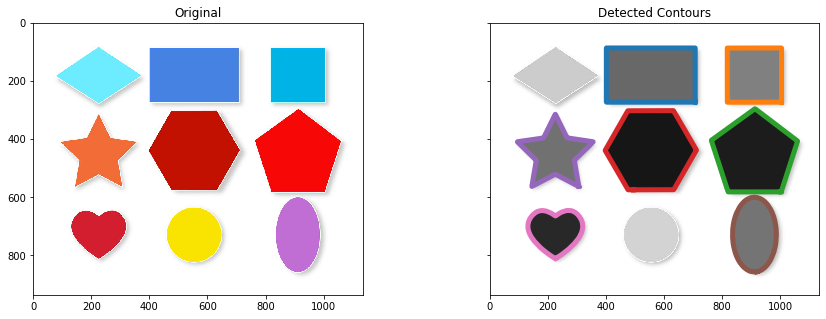

In [2]:
img = imread('shapes.jpg')
gray_img = color.rgb2gray(img)

contours = measure.find_contours(gray_img,level=0.7)

f,ax = plt.subplots(1,2,figsize=(15,5),sharex=True,sharey=True)
ax = ax.ravel()

ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(gray_img,cmap='gray')
for n,contour in enumerate(contours):
    ax[1].plot(contour[:,1],contour[:,0],lw=5)
ax[1].set_title('Detected Contours')
       
plt.show()

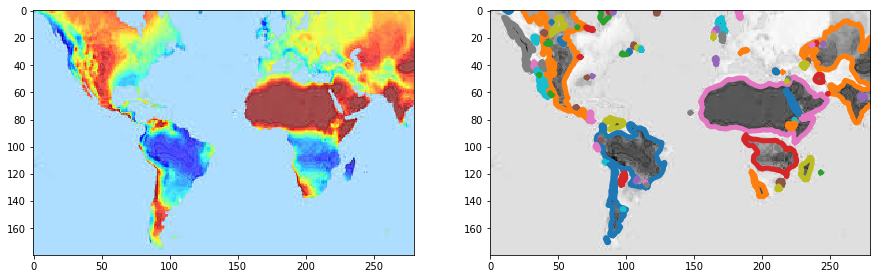

In [3]:
img = imread('contour.jpeg')
gray_img = color.rgb2gray(img)

contours = measure.find_contours(gray_img,level=0.66)

f,ax = plt.subplots(1,2,figsize=(15,5))
ax[1].imshow(gray_img,cmap='gray')

ax[0].imshow(img)
for n,contour in enumerate(contours):
    ax[1].plot(contour[:,1],contour[:,0],lw=5)

# Convex Hull 
Sayy Whaaaaa??????
Yeah so in very scientific terms, *Given a set of points X, convex hull will be the smallest polygon possible to contain all the points of X.* 

Simple? Connecting all the outer points in a scatter plot (example) will give you the convex hull.

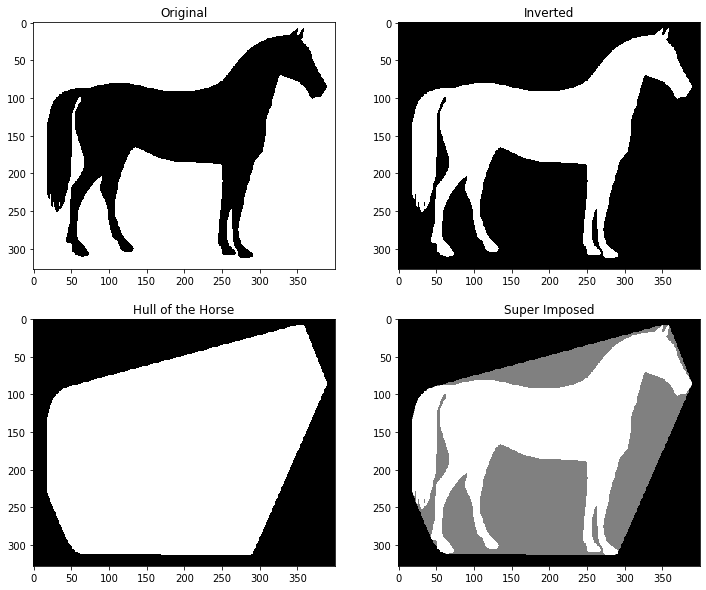

In [4]:
horse = data.horse() # grayscale image of a camera
inverted_horse = util.invert(horse) # invert the image
horse_hull = morphology.convex_hull_image(inverted_horse)

# let us super impose the hull on top of our inverted image
horse_hull_copy = img_as_float(horse_hull.copy())
horse_hull_copy[inverted_horse] = 2 # set all the pixels vales to gray except True Values


f,ax = plt.subplots(2,2,figsize=(12,10))
ax = ax.ravel()

ax[0].imshow(horse,cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(inverted_horse,cmap='gray')
ax[1].set_title('Inverted')

ax[2].imshow(horse_hull,cmap='gray')
ax[2].set_title('Hull of the Horse')

ax[3].imshow(horse_hull_copy,cmap='gray')
ax[3].set_title('Super Imposed')
       
plt.show()

# Edge Detection
1. Search Based Algo (Firt order Partial Derivatives)
2. Zero Crossing (Second order PArtial Derivatives)

Idea is to see the values where there is abrupt change in pixel intensities. 

**Working:**
1. Find the derivatives of X and Y to see where there are intnsities changing. I can be X,Y or some direction .
2. Find the Gradients of Magnitude. What does that even mean?? It means to find the exact direction where the intensities are getting to a minimum or maximum.
3. Apply a threshold on gradient to say "okay! at this threshold, the gradients are making sense and giving me edges"

**GENERAL STEPS TO APPLY BEFORE EDGE DETECTION METHODS**

Always Convert  to Grayscale
1. Smoothening Images ( Bilateral or Gaussian Filters) (Large Sigma in Gaussian Filter, Less Sensitive to Noise and detects only Large Edges are detected)
2. Enhance Image (Sharpening)
3. Detect Edge
4. If not good, apply a few more of Steps 1 and 2

## Search Based
### Sobel and Roberts Edge Detection Algo
They use a sliding Kernel specially designed to detect the edges which is iterated over the whole image in steps. Sounds familiar? Yes, Exactly. It is Convolution Function with Sobel Kernel.

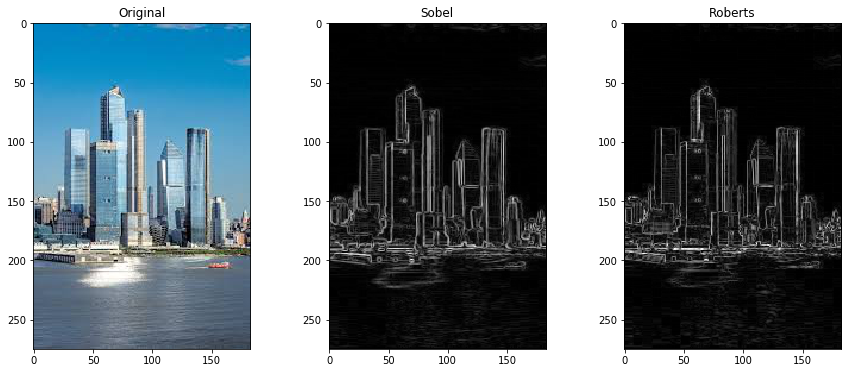

In [5]:
buildings = imread('buildings.jpeg')
gray_buildings = color.rgb2gray(buildings) # convert to gray scale

# use gauss or bilateral filters and sharpening here but as our image is in good quailt, we don't need

sobel_edges = filters.sobel(gray_buildings)
roberts_edges = filters.roberts(gray_buildings)

f,ax = plt.subplots(1,3,figsize=(15,6))

ax[0].imshow(buildings)
ax[0].set_title('Original')

ax[1].imshow(sobel_edges,cmap='gray')
ax[1].set_title('Sobel')

ax[2].imshow(roberts_edges,cmap='gray')
ax[2].set_title('Roberts')

plt.show()

## Zero Crossing
### Canny
Enhances Signal to Noise Ratio so that it can be used in noisy images too

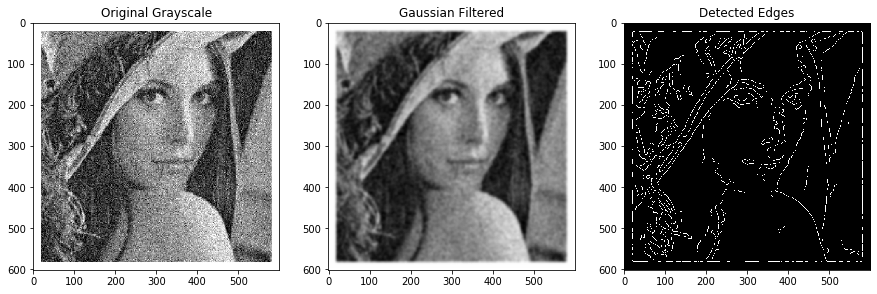

In [6]:
noisy_img = imread('noisy image.png')
noisy_gray = color.rgb2gray(noisy_img)
filtered_img = ndimage.gaussian_filter(noisy_img,sigma=(3,3)) # sigma can be in terms of a single float 
detected = feature.canny(filtered_img,sigma=0.7)

f,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].imshow(noisy_gray,cmap='gray')
ax[0].set_title('Original Grayscale')

ax[1].imshow(filtered_img,cmap='gray')
ax[1].set_title('Gaussian Filtered')

ax[2].imshow(detected,cmap='gray')
ax[2].set_title('Detected Edges')
plt.show()

# Corner Detection
## Harris Corner Detection Algorithm
Corners have very low self similarity means they are different from the other neighbouring points in some way be it intensity or something else. Suppress the weak points or weak corners to get just the strong or sharp corners.

### Find Corners

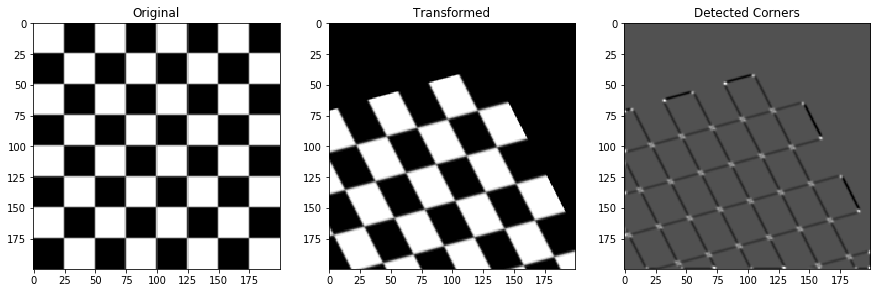

In [7]:
board = data.checkerboard()
transform_obj = transform.AffineTransform(scale=(0.91,0.87),rotation=(0.23),shear=0.33,
                                          translation=(101,-53))
# translation will shift the image pixels to (x+x_trans,y+y_trans) position or it can shift the image from
# - top to bottom or right left if given coordinates
# scaling is increasing or decreasing the size of image by a factor
# shear works like changing a square to a rhomboid

transformed_img = transform.warp(board,transform_obj)
corner_img = feature.corner.corner_harris(transformed_img)

f,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].imshow(board,cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(transformed_img,cmap='gray')
ax[1].set_title('Transformed')

ax[2].imshow(corner_img,cmap='gray')
ax[2].set_title('Detected Corners')
plt.show()

### FInd Statistical Significance
Find if a corner is actually a corner made by intesection of two lines or just a single point

In [8]:
x_y_corner_coords = feature.corner.corner_peaks(corner_img)
x_y_corner_sub = feature.corner.corner_subpix(transformed_img,x_y_corner_coords) # change window size param
# find the subpixels
df = pd.DataFrame() # to compare the difference in the corner positions
df['X Before'] = x_y_corner_coords[:,0]
df['X After'] = x_y_corner_sub[:,0]
df['Y Before'] = x_y_corner_coords[:,1]
df['Y After'] = x_y_corner_sub[:,1]
df.head()

,X Before,X After,Y Before,Y After
0,43,41.857414,104,104.794076
1,49,48.582612,81,80.236190
2,57,55.730054,55,55.628079
3,63,62.438531,32,31.030690
4,65,64.530482,144,144.902529


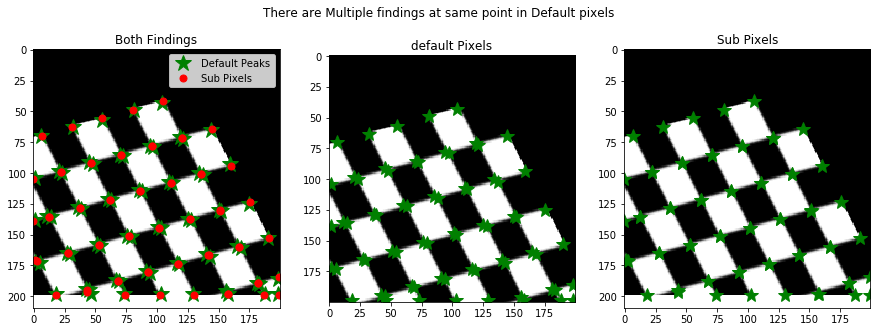

In [9]:
f,ax = plt.subplots(1,3,figsize=(15,5))
f.suptitle('There are Multiple findings at same point in Default pixels')

ax[0].imshow(transformed_img,cmap='gray')
ax[0].set_title('Both Findings')
ax[0].plot(x_y_corner_coords[:,1],x_y_corner_coords[:,0],color='green',markersize=17,ls='none',marker='*',
           label='Default Peaks')

ax[0].plot(x_y_corner_sub[:,1],x_y_corner_sub[:,0],color='red',markersize=7,ls='none',marker='o',
           label='Sub Pixels')

ax[0].legend()


ax[1].imshow(transformed_img,cmap='gray')
ax[1].set_title('default Pixels')
ax[1].plot(x_y_corner_coords[:,1],x_y_corner_coords[:,0],color='green',markersize=15,ls='none',marker='*')

ax[2].imshow(transformed_img,cmap='gray')
ax[2].set_title('Sub Pixels')
ax[2].plot(x_y_corner_sub[:,1],x_y_corner_sub[:,0],color='green',markersize=15,ls='none',marker='*')


plt.show()